# Levenshtein Distance 
compute and rank Levenshtein distance between ST words and competitor sets from BNC lexicon 
- create BNC frequency lexicon 
- read Study tables
- for each ST word compute competitor set (set of most similr words) in the BNC frequency lexicon
- for each ST word rank competitor set in various ways 
- store rankings foreach word in ST dataframe
- visualize distributions and compute correlations 

In [475]:
# import kent library
import sys
sys.path.insert(0, '/data/critt/shared/Spring19/')

import kent
import importlib
importlib.reload(kent)

<module 'kent' from '/data/critt/shared/Spring19/kent.py'>

In [ ]:
# Levenshtein distance from https://stackabuse.com/levenshtein-distance-and-text-similarity-in-python/
import numpy as np

def levenshtein(seq1, seq2):  
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
#    print (matrix)
    return (matrix[size_x - 1, size_y - 1])

In [ ]:
x = "This is the fisd string"
y = "This is the second string"
levenshtein(x, y) 

In [78]:
levenshtein("Hi","ello")

4.0

# Task: program a function for spell checker 
 - check wheter word is in BNC freq lexicon (with e.g. freq > 4)
 - otherwise search for set of nearest neighbors
 - return list of most similar words in the BNC

In [ ]:
# retrieve similar words from the BNC
from collections import defaultdict
import numpy as np

def dicSim(word, DIC):
    if (word in DIC): return([])

    r = [] # initialize list of most similar words
    m = len(word) # initialize minimum similarity 
    
    for dic in DIC :
        # ignore entries with low frequencies (perhaps typos)
        if(DIC[dic] < 4) : continue

        # computer the levinsthein distance
        lev = int(levenshtein(dic, word))
        
        # initialize list of most similar words
        if(lev < m) :
            r = [dic]
            m = lev
            
        # add word to list of most similar words
        elif(lev == m) : r.append(dic)
        
    return(r)

In [ ]:
# read BNC word frequency dictionary 
import re

def readFreqDic(dictionary) :
    Dic = {}
    with open(dictionary,"r", encoding="utf8") as file:
        for entry in file:
            tok, num = re.findall("^(.*?)[\s]+(.*?)$", entry)[0]
            Dic[tok] = int(num)
    return (Dic)


In [ ]:
# read BNC frequency dictionary ("Produce a word frequency lexicon from the BNC")
BNC_DIC = readFreqDic('/data/critt/shared/Spring19/lemmaLexicon/BNC.freqLex')

In [63]:
list(BNC_DIC.keys())[:5]

['the', ',', '.', 'of', 'and']

In [ ]:
# Ignore words with length 1
# Remove alpha-num and numerical tokens
#

In [358]:
# Creates a frequency dictionary with key as the lenght of the string and value as a list of key:value containing word:frequency
# It eliminates the numerical, alphanumerical and special characters containing strings
import re
def create_freq_dic(dic):
    new_dic = dict()
    new_dic.setdefault(1,dict())
    for key in dic.keys():
        l = len(key)
        #if l> 20:
            #print(str(key) + "   " + str(dic[key]))
        #new_dic.setdefault(l,dict())
        pattern = r"[a-zA-Z]{"+str(l)+"}"
        is_alpha = re.fullmatch(pattern, key)
        if l == 1: 
            continue
        else:
            if is_alpha:
                try:
                    new_dic[l][key] = dic[key]
                except KeyError as er:
                    new_dic.setdefault(l,dict())
                    new_dic[l][key] = dic[key]
                    #new_dic[l] = {l: dic[key]}
    return new_dic  

In [359]:
new_freq_dic = create_freq_dic(BNC_DIC)

In [406]:
# sort dictionary by items and return a list of tuples
sorted_by_value = sorted(freq_dic4.items(), key = 
             lambda kv:(kv[1], kv[0]))
# filter the list of tuples to find tuples whose value is > n
filtered_list = list(filter(lambda n: n[1]>25, sorted_by_value))
len(filtered_list)

5901

In [ ]:
# Create a frequency Dictionary (old approach)
dic_len = {}
for key in BNC_DIC.keys():
    l = len(key)
    try:
        dic_len[l][key] = BNC_DIC[key]
    except KeyError as er:
        dic_len[l] = {l: BNC_DIC[key]}

In [108]:
# Dump a dictionary to the file system
json_dic_of_len_words_freq  = json.dumps(dic_len)
f = open('/users/kent/dsahoo/dic_len_words_freq.json','w')
f.write(json_dic_of_len_words_freq)
f.close()

In [88]:
def dicSim2(token, dic_len_freq):
    similar_list = []
    length = len(token)
    
    matched_list = list(dic_len_freq[length].keys())
    if token in matched_list: 
        return similar_list.append(match)
    else: 
        keys = list(dic_len_freq[length].keys())
        for key in keys:
            lev = int(levenshtein(token, str(key)))
            if lev <= 2:
                similar_list.append(key)
    return similar_list     

In [ ]:
dicSim("sunito", BNC_DIC)

In [ ]:
# retrieve set of most similar words 

dicSim2("sunito", dic_len)

# Task:
# the function "dicSim" comapres (almost) all words in the BNC:
# try to think of ways to make retrieval faster

---------------------

# Generate and quantify competitor sets of study ST words 
- Read ST tables of PARA19 study into dataFrame
- Produce distance measures for competitor sets 
- visualize histogram, regression analysis

In [476]:
# read the PARA19 study data
STdf = kent.readTPDDBtables(["PARA19/Tables/"], "*st", path="/data/critt/tprdb/KENT/")

In [ ]:
# All the words in SToken of STdf
source_words = STdf['SToken'].tolist()

In [425]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
def find_levenstine_word_list(word,lev_dist):
    word = word.lower()
    # Stores all the words of same levinstine distance as the target word
    word_list = []
    
    # If target_word is stop word, return empty list
    if word in stop_words:
        return word_list
    l = len(word)
    
    # return for target length word = 1
    if l == 1: 
        return word_list
    
    # Find lev_dist for words in length of target word
    d = new_freq_dic[l]
    for w in list(d.keys()):
        if d[w] > 10:
            lev = levenshtein(word,str(w))
            if lev == lev_dist:
                word_list.append(w)
    # Find lev_dist for words in length-1 of target word
    d = new_freq_dic[l-1]
    for w in list(d.keys()):
        # Ignore words with frequency < 10, as they may be typos
        if d[w] > 10:
            lev = levenshtein(word,str(w))
            if lev == lev_dist:
                word_list.append(w)
    
    # Find lev_dist for words in length+1 of target word
    d = new_freq_dic[l+1]
    for w in list(d.keys()):
        if d[w] > 10:
            lev = levenshtein(word,str(w))
            if lev == lev_dist:
                word_list.append(w)
        
    return word_list

[nltk_data] Downloading package stopwords to
[nltk_data]     /users/kent/dsahoo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Finds the levinstine word list for a given word
find_levenstine_word_list("hunter", 1)

In [92]:
def find_levenstine_distance(word,lev_dist):
    word_list = []
    l = len(word)
    d = dic_len[l]
    for w in list(d.keys()):
        lev = levenshtein(word,str(w))
        if lev == lev_dist:
            word_list.append(w)
        
    return word_list

In [437]:
# Check if the word is only alphabets
def is_alpha(word): 
    l = len(word)
    pattern = r"[a-zA-Z]{"+str(l)+"}"
    is_alpha = re.fullmatch(pattern, word)
    return is_alpha

In [ ]:
# Create a dictionary of source words to a list of lev distance 1 words
from tqdm import tqdm
word_to_lev_dic = {}
for word in tqdm(set(source_words)):
    if is_alpha(word):
        lev_1 = find_levenstine_word_list(word,1)
        word_to_lev_dic[word] = lev_1

In [441]:
# convert a dictionary to json
import json
lev1_json = json.dumps(word_to_lev_dic)

In [111]:
# reads a file and load a json object
lev1_json = open("/users/kent/dsahoo/stoken_lev3_distance.json","r").read()
lev1_json = json.loads(lev3_json)

In [442]:
# Write a json object to a file.
f = open("/users/kent/dsahoo/stoken_lev1_wordlist_new.json","w")
f.write(lev1_json)
f.close()

In [230]:
i = 0
print("Word\t\tLev1\t\tLev2\t\tLev3\t\tLev4\t\tLev5")
for word in source_words:
    if i < 100:
        print(word+"\t\t"+ str(len(word_to_lev1_dic[word]))+"\t\t"+str(len(word_to_lev2_dic[word]))+"\t\t"+str(len(lev3_json[word]))+"\t\t"+str(len(word_to_lev4_dic[word]))+"\t\t"+str(len(word_to_lev5_dic[word])))
        i+=1

Word		Lev1		Lev2		Lev3		Lev4		Lev5
Killer		12		151		532		5007		15303
nurse		5		122		755		10671		47734
receives		4		14		41		484		2702
four		21		376		2087		31089		0
life		24		449		2113		30832		0
sentences		4		4		12		136		878
Hospital		2		1		5		82		799
nurse		5		122		755		10671		47734
Colin		8		164		756		10196		48047
Norris		9		60		217		4540		17733
was		71		1668		7378		0		0
imprisoned		1		0		1		10		72
for		57		1443		7540		0		0
life		24		449		2113		30832		0
today		8		163		786		10895		47377
for		57		1443		7540		0		0
the		68		1447		7653		0		0
killing		14		82		328		2358		4930
of		73		1465		0		0		0
four		21		376		2087		31089		0
of		73		1465		0		0		0
his		70		1612		7390		0		0
patients		1		7		23		478		2982
.		53		0		0		0		0
32		78		1459		0		0		0
year		28		387		2194		30728		0
old		53		1299		7768		0		0
Norris		9		60		217		4540		17733
from		18		325		1902		31053		0
Glasgow		1		3		3		307		2626
killed		16		138		477		4866		15947
the		68		1447		7653		0		0
four		21		376		2087		31089		0
women		16		196		94

## Produce various distance measures for competitor sets 

Compute various measures for each ST word $w$ in competitor set $C_w$:
    (i.e. any word $s$ in the BNC with same length as $w$ differing by a one letter(s))
    
1. size $m$ of competitor set 
2. sum of competitor set similarity scores: $\sum_{s\in C} 1-(lev /len(s))$
3. average similarity: $ 1/m \sum_{s\in C} 1-(lev / len(s)) $        
4. sum of log salience (frequency) of competitor words: $\sum_{s\in C} log(salience(s))$
5. average log salience (frequency) of competitor words: $1/m \sum_{s\in C} log(salience(s))$

     - for competitor set $C_w$ with two, three, .. , n different letters

6. ranked versions of measures 1 ..5 (divide by $lev$)

    - add competitor metrics for each ST word to dataFrame as feature "SimS1", "SimS2", .... "SimSn"


In [465]:
competitor_sim_scores("counts",word_to_lev_dic,1)

0.8222222222222223

In [474]:
salience_score("32",word_to_lev_dic,1,new_freq_dic)

0

In [448]:
source_words

['Killer',
 'nurse',
 'receives',
 'four',
 'life',
 'sentences',
 'Hospital',
 'nurse',
 'Colin',
 'Norris',
 'was',
 'imprisoned',
 'for',
 'life',
 'today',
 'for',
 'the',
 'killing',
 'of',
 'four',
 'of',
 'his',
 'patients',
 '.',
 '32',
 'year',
 'old',
 'Norris',
 'from',
 'Glasgow',
 'killed',
 'the',
 'four',
 'women',
 'in',
 '2002',
 'by',
 'giving',
 'them',
 'large',
 'amounts',
 'of',
 'sleeping',
 'medicine',
 '.',
 'Yesterday',
 ',',
 'he',
 'was',
 'found',
 'guilty',
 'of',
 'four',
 'counts',
 'of',
 'murder',
 'following',
 'a',
 'long',
 'trial',
 '.',
 'He',
 'was',
 'given',
 'four',
 'life',
 'sentences',
 ',',
 'one',
 'for',
 'each',
 'of',
 'the',
 'killings',
 '.',
 'He',
 'will',
 'have',
 'to',
 'serve',
 'at',
 'least',
 '30',
 'years',
 '.',
 'Police',
 'officer',
 'Chris',
 'Gregg',
 'said',
 'that',
 'Norris',
 'had',
 'been',
 'acting',
 'strangely',
 'around',
 'the',
 'hospital',
 '.',
 'Only',
 'the',
 'awareness',
 'of',
 'other',
 'hospital',
 

In [ ]:
word_to_lev1_dic
word_to_lev2_dic
word_to_lev3_dic
word_to_lev4_dic
word_to_lev5_dic
frequency_map
# New dictionary with frequency of words
new_freq_dic

# Contains source word to lev1 distance word list
word_to_lev_dic

In [215]:
s1 = competitor_sim_scores("Norris", word_to_lev1_dic, 1)
s2 = competitor_sim_scores("Norris", word_to_lev1_dic, 2)
s3 = competitor_sim_scores("Norris", word_to_lev1_dic, 3)
s4 = competitor_sim_scores("Norris", word_to_lev1_dic, 4)
s5 = competitor_sim_scores("Norris", word_to_lev1_dic, 5)
print(f"Sim Score for token - Norris is lev1 = {s1:.3f} lev2 = {s2:.3f} lev3 = {s3:.3f} lev4 = {s4:.3f} lev5 = {s5:.3f} ")
print(f"Sim Score for token - Norris is lev1 = {s1/1:.3f} lev2 = {s2/2:.3f} lev3 = {s3/3:.3f} lev4 = {s4/4:.3f} lev5 = {s5/5:.3f} ")

Sim Score for token - Norris is lev1 = 0.833 lev2 = 0.667 lev3 = 0.500 lev4 = 0.333 lev5 = 0.167 
Sim Score for token - Norris is lev1 = 0.833 lev2 = 0.333 lev3 = 0.167 lev4 = 0.083 lev5 = 0.033 


In [506]:
def competitor_sim_scores(token, token_dic, lev):
    similar_list = list()
    try:
        similar_list = token_dic[token]
    except KeyError as ex:
        pass
    similarity_score = 0
    summation = 0
    avg = 0
    list_length = len(similar_list)
    token_length = len(token)
    if similar_list:
        for word in similar_list:
            score = 1 - (lev / len(word))
            summation += score
        if summation:
            avg = summation/list_length
        
    return summation, avg

In [505]:
import math
def salience_score(token, token_dic, lev, frequency_map):
    similar_list = list()
    try:
        similar_list = token_dic[token]
    except KeyError as ex:
        pass
    salience_score = 0
    summation = 0
    avg = 0
    list_length = len(similar_list)
    token_length = len(token)
    #word_frequencies = frequency_map[token_length]
    if similar_list:
        for word in similar_list:
            word_frequencies = frequency_map[len(word)]
            freq = word_frequencies[word]
            summation += math.log(freq)
        avg = summation/list_length
        
    return summation, avg

In [477]:
mydf = STdf

In [502]:
def add_competitor_set_count(df, sim_col_name, lev_dic, lev, add_col=False):
    if add_col:
        df[sim_col_name] = 0
        
    for id in list(df.index):
        stoken = mydf.at[id,'SToken'] 
        try:
            comp_list = lev_dic[stoken]
        except KeyError as ex:
            comp_list = []
        mydf.at[id, sim_col_name] = len(comp_list)
        
    print(f"The column {sim_col_name} updated successfully")

In [514]:
def add_sim_score(df, sim_col_name, lev_dic, lev, add_col=False):
    if add_col:
        df[sim_col_name] = 0.0
        
    for id in list(df.index):
        stoken = mydf.at[id,'SToken'] 
        summ, avg = competitor_sim_scores(stoken, lev_dic, lev)
        mydf.at[id, sim_col_name] = float(summ)
        
    print(f"The column {sim_col_name} updated successfully")

In [510]:
def add_salience_score(df, sim_col_name, lev_dic, frequency_map, lev, add_col=False):
    if add_col:
        df[sim_col_name] = 0.0
        
    for id in list(df.index):
        stoken = mydf.at[id,'SToken'] 
        summ, avg = salience_score(stoken, lev_dic, lev, frequency_map)
        #score = competitor_sim_scores(stoken, lev_dic, lev)
        mydf.at[id, sim_col_name] = float(summ)
        
    print(f"The column {sim_col_name} updated successfully")

In [515]:
add_sim_score(mydf, "SimS4", word_to_lev_dic, 1, True)
#add_sim_score(mydf, "SimS2", word_to_lev2_dic, 2, True)
#add_sim_score(mydf, "SimS3", word_to_lev3_dic, 3, True)
#add_sim_score(mydf, "SimS4", word_to_lev4_dic, 4, True)
#add_sim_score(mydf, "SimS5", word_to_lev5_dic, 5, True)

The column SimS4 updated successfully


In [503]:
add_competitor_set_count(mydf, "SimS3", word_to_lev_dic, 1, True)

The column SimS3 updated successfully


In [512]:
add_salience_score(mydf, "SimS5", word_to_lev_dic, new_freq_dic, 1, True)

The column SimS5 updated successfully


In [516]:
mydf.head()

,Id,STseg,Study,Session,SL,TL,Task,Text,Part,SToken,...,CountT,ProbT,HTra,HSeg,HCross,SimS1,SimS2,SimS3,SimS4,SimS5
0,1,1,PARA19,P01_C1,en,en,C,1,P01,Killer,...,6,0.4615,1.8920,1.2389,1.8920,0.835317,4.578891,12,10.023810,54.946691
1,2,1,PARA19,P01_C1,en,en,C,1,P01,nurse,...,10,0.7692,0.7793,0.7793,1.8230,0.814286,5.358831,7,5.700000,37.511816
2,3,1,PARA19,P01_C1,en,en,C,1,P01,receives,...,6,0.4615,2.1416,1.1401,1.8230,0.874206,6.960643,5,4.371032,34.803213
3,4,1,PARA19,P01_C1,en,en,C,1,P01,four,...,7,0.5385,1.4573,0.7793,1.4885,0.736275,6.994141,17,12.516667,118.900402
4,5,1,PARA19,P01_C1,en,en,C,1,P01,life,...,9,0.6923,0.8905,0.8905,0.8905,0.749074,6.328766,18,13.483333,113.917780


In [ ]:
# put here your functions to compute competitor similarity metrics
# and add to STdf dataframe as "SimS1", "SimS2" ...



## Visualize and correlate competitor sets similarities 
- pre-process STdf data
- Empirical cumulative distribution functions 
- Exclude outliers greater or smaller than 2 SD
-

In [223]:
# exclude outliers in dataframe df 
def excludeOutliers(df, col) :
    mean = np.mean(np.array(df[col]), axis=0)
    sd = np.std(np.array(df[col]), axis=0)
    return(df[(df[col] > mean - 2 * sd) & (df[col] < mean + 2 * sd)])

In [224]:
# Empirical cumulative distribution functions 
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

In [236]:
mydf.iloc[:10]

,Id,STseg,Study,Session,SL,TL,Task,Text,Part,SToken,...,CountT,ProbT,HTra,HSeg,HCross,SimS1,SimS2,SimS3,SimS4,SimS5
0,1,1,PARA19,P01_C1,en,en,C,1,P01,Killer,...,6,0.4615,1.8920,1.2389,1.8920,0.833333,0.666667,0.500000,0.333333,0.166667
1,2,1,PARA19,P01_C1,en,en,C,1,P01,nurse,...,10,0.7692,0.7793,0.7793,1.8230,0.800000,0.600000,0.400000,0.200000,-1.000000
2,3,1,PARA19,P01_C1,en,en,C,1,P01,receives,...,6,0.4615,2.1416,1.1401,1.8230,0.875000,0.750000,0.625000,0.500000,0.375000
3,4,1,PARA19,P01_C1,en,en,C,1,P01,four,...,7,0.5385,1.4573,0.7793,1.4885,0.750000,0.500000,0.250000,-1.000000,-1.000000
4,5,1,PARA19,P01_C1,en,en,C,1,P01,life,...,9,0.6923,0.8905,0.8905,0.8905,0.750000,0.500000,0.250000,-1.000000,-1.000000
5,6,1,PARA19,P01_C1,en,en,C,1,P01,sentences,...,9,0.6923,1.1401,1.1401,1.1401,0.888889,0.777778,0.666667,0.555556,0.444444
6,7,2,PARA19,P01_C1,en,en,C,1,P01,Hospital,...,7,0.5385,1.5734,1.2389,2.1920,0.875000,0.750000,0.625000,0.500000,0.375000
7,8,2,PARA19,P01_C1,en,en,C,1,P01,nurse,...,11,0.8462,0.6194,0.6194,2.3535,0.800000,0.600000,0.400000,0.200000,-1.000000
8,9,2,PARA19,P01_C1,en,en,C,1,P01,Colin,...,12,0.9231,0.3912,0.3912,2.4997,0.800000,0.600000,0.400000,0.200000,-1.000000
9,10,2,PARA19,P01_C1,en,en,C,1,P01,Norris,...,11,0.8462,0.7732,0.3912,1.1451,0.833333,0.666667,0.500000,0.333333,0.166667


In [517]:
mydf[["SimS1", "SimS2", "SimS3", "SimS4","SimS5", "Ins", "Del","Dur", "TrtS", "TrtT", "HTra", "HCross" ]].corr()

,SimS1,SimS2,SimS3,SimS4,SimS5,Ins,Del,Dur,TrtS,TrtT,HTra,HCross
SimS1,1.000000,0.947649,0.447889,0.493957,0.449346,0.224248,0.048387,0.113068,0.181261,0.087789,0.235202,0.192790
SimS2,0.947649,1.000000,0.465128,0.503831,0.487657,0.209703,0.041526,0.103625,0.161423,0.081232,0.238591,0.188495
SimS3,0.447889,0.465128,1.000000,0.992681,0.992851,0.003063,-0.000017,-0.010110,-0.015855,0.030423,0.175632,0.096915
SimS4,0.493957,0.503831,0.992681,1.000000,0.987022,0.012272,0.000455,-0.007005,-0.006763,0.032356,0.180338,0.101146
SimS5,0.449346,0.487657,0.992851,0.987022,1.000000,0.003605,-0.001225,-0.010992,-0.017340,0.028237,0.178429,0.103166
Ins,0.224248,0.209703,0.003063,0.012272,0.003605,1.000000,0.676864,0.727245,0.202391,0.433558,0.121301,0.115598
Del,0.048387,0.041526,-0.000017,0.000455,-0.001225,0.676864,1.000000,0.715516,0.078421,0.407713,0.011522,0.025333
Dur,0.113068,0.103625,-0.010110,-0.007005,-0.010992,0.727245,0.715516,1.000000,0.192765,0.479111,0.062914,0.068967
TrtS,0.181261,0.161423,-0.015855,-0.006763,-0.017340,0.202391,0.078421,0.192765,1.000000,0.174482,0.107562,0.057689
TrtT,0.087789,0.081232,0.030423,0.032356,0.028237,0.433558,0.407713,0.479111,0.174482,1.000000,0.122153,0.110813


In [521]:
# Pre process data for dependent and independent variables
# - take out outliers (-2< and >2 SD)
# - take out values < 0

# independent variable
indFeat = "SimS1"

# dependent Variable
depFeat = "Dur"


###########
# pre-process data
#data = mydf[(mydf.SimS1 > 0)]

# exclude values <= 0 of independent variable
data = data[(data[indFeat] > 0)]

# exclude outliers of independent variable
data = excludeOutliers(data, indFeat)

# compute log transformation for independent Variable
indFeatL = indFeat + "Log"
data[indFeatL] = np.log(data[indFeat])

#######
# exclude outliers for dependent variable
data = data[(data[depFeat] > 0)]
data = excludeOutliers(data, depFeat)

# compute log transformation for dependent Variable
depFeatL = depFeat + "Log"
data[depFeatL] = np.log(data[depFeat])

#######
# take log-transformation of dependent / indpendent variable
depFeat = depFeatL
indFeat = indFeatL

#######
# compute "STlen" length of SToken
data["STlen"] = data["SToken"].apply(len)

# show data only for ST words of langth 4
#data = data[(data.STlen == 4) & (data.SimS1 > 0)]

#######
# show correlation matrix
#data = data[(data.STlen == 4)]
#data = data[(data.SimS1 > 0)]

#print(data[["SToken","SimS1"]])
print(data[["SimS1", "SimS2", "Ins", "Del","Dur", "TrtS", "TrtT", "HTra", "HCross" ]].corr())


           SimS1     SimS2       Ins       Del       Dur      TrtS      TrtT  \
SimS1   1.000000  0.138582  0.652564  0.012680  0.374347  0.224537  0.120898   
SimS2   0.138582  1.000000  0.123232 -0.016109  0.055097 -0.000943  0.014510   
Ins     0.652564  0.123232  1.000000  0.353622  0.655568  0.179389  0.266419   
Del     0.012680 -0.016109  0.353622  1.000000  0.448982  0.003735  0.158861   
Dur     0.374347  0.055097  0.655568  0.448982  1.000000  0.214776  0.275315   
TrtS    0.224537 -0.000943  0.179389  0.003735  0.214776  1.000000  0.213758   
TrtT    0.120898  0.014510  0.266419  0.158861  0.275315  0.213758  1.000000   
HTra    0.129633  0.071126  0.154186 -0.014321  0.066940  0.032444 -0.002590   
HCross  0.091417 -0.007557  0.067974 -0.003744  0.031089 -0.017462  0.029427   

            HTra    HCross  
SimS1   0.129633  0.091417  
SimS2   0.071126 -0.007557  
Ins     0.154186  0.067974  
Del    -0.014321 -0.003744  
Dur     0.066940  0.031089  
TrtS    0.032444 -0.01746

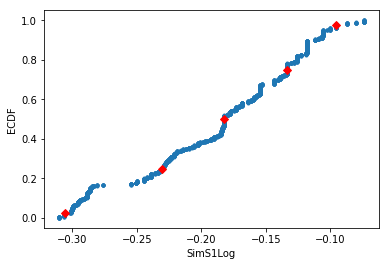

/usr/local/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


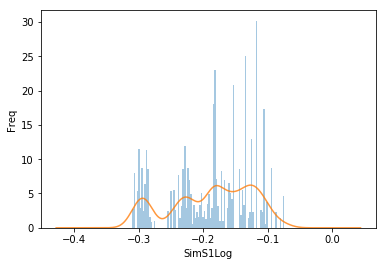

In [522]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

######################
# visualization of independent variable
dataInd = data[indFeat]

## Empirical cumulative distribution functions 
# Compute percentiles: ptiles_vers
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ptiles_vers = np.percentile(dataInd, percentiles)

x, y = ecdf(dataInd)

# Generate plot
_ = plt.plot(x, y, marker = '.', linestyle='none')
_ = plt.xlabel(indFeat)
_ = plt.ylabel("ECDF")
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red', linestyle="none")

plt.show()

##### Histogram and density function 

s1 = pd.Series(dataInd)
s1.plot.hist(bins=100,normed=True, alpha=0.4)
s1.plot.density(alpha=0.8)

#s1.plot.density(alpha=0.8)
plt.xlabel(indFeat)
plt.ylabel('Freq')
plt.show()


In [523]:
# Task :
# plot Empirical cumulative distribution for dependent variable
# plot Histogram and density function 

/usr/local/lib64/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


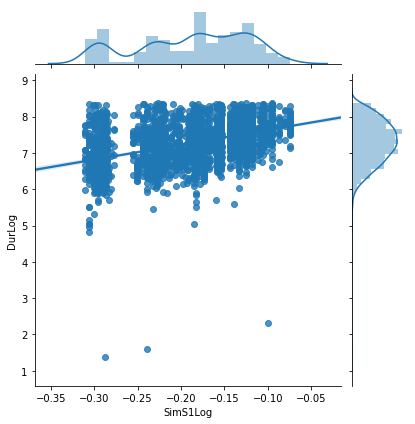

In [524]:
import seaborn as sns

# Regression graph

sns.jointplot(y=depFeat, x=indFeat, data=data, kind="reg");
plt.show()

                            OLS Regression Results                            
Dep. Variable:                 DurLog   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     108.3
Date:                Wed, 24 Apr 2019   Prob (F-statistic):          1.54e-103
Time:                        23:41:50   Log-Likelihood:                -2034.1
No. Observations:                2442   AIC:                             4080.
Df Residuals:                    2436   BIC:                             4115.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.0699      0

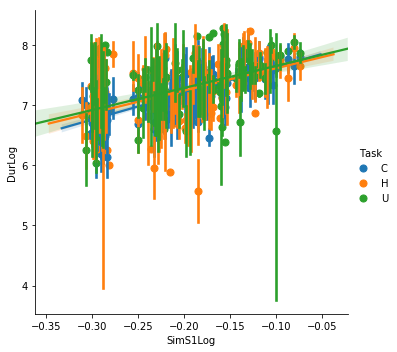

In [525]:
import statsmodels.formula.api as smf
import statsmodels.api as sma

form =depFeat + "~" + indFeat 
form =depFeat + "~" + indFeat + "* Task" 
lmf = smf.ols(formula=form, data=data).fit()

print(lmf.summary())

sns.lmplot(y=depFeat, x=indFeat, hue="Task", x_estimator=np.mean, data=data);

plt.show()


## Produce a word frequency lexicon from the BNC
auxilliary functions no need to repeat this ...
